<a href="https://colab.research.google.com/github/soodeh-nilforoushan/Recurrent-Neural-Network/blob/main/2_TF_Liner_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2023-08-30 04:59:08--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-08-30 04:59:08 (32.3 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [22]:
data=pd.read_csv("moore.csv", header=None).to_numpy()

In [23]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [24]:
X=data[:,0]
X

array([1971, 1972, 1973, 1973, 1974, 1974, 1974, 1975, 1976, 1976, 1976,
       1978, 1978, 1979, 1979, 1979, 1981, 1982, 1982, 1983, 1984, 1984,
       1985, 1985, 1985, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988,
       1988, 1989, 1989, 1989, 1989, 1990, 1991, 1991, 1992, 1992, 1993,
       1993, 1994, 1994, 1995, 1999, 1995, 1996, 1997, 1997, 1997, 1998,
       1999, 1999, 2000, 2000, 1999, 1999, 1999, 2000, 2001, 2001, 2002,
       2004, 2004, 2005, 2006, 2005, 2006, 2007, 2008, 2003, 2003, 2002,
       2005, 2005, 2006, 2007, 2003, 2008, 2009, 2011, 2012, 2007, 2007,
       2008, 2004, 2007, 2008, 2008, 2007, 2009, 2010, 2012, 2013, 2011,
       2010, 2010, 2012, 2012, 2010, 2012, 2014, 2006, 2015, 2013, 2015,
       2008, 2010, 2014, 2015, 2015, 2012, 2011, 2010, 2014, 2011, 2012,
       2014, 2016, 2017, 2017, 2018, 2012, 2016, 2016, 2015, 2013, 2017,
       2014, 2017, 2017, 2017, 2012, 2013, 2014, 2017, 2018, 2016, 2018,
       2017, 2018, 2017, 2015, 2017, 2016, 2017, 20

In [25]:
X=data[:,0].reshape(-1,1)
Y=data[:,1]
X

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

reshape(-1,1): This is because most machine learning libraries we will use will assume that X is a two dimensional

why is it a two dimensional rate? Because it has samples meaning each row and it has input features.

So in this case, it turns out D is one, but we still have to pass in something that has the shape

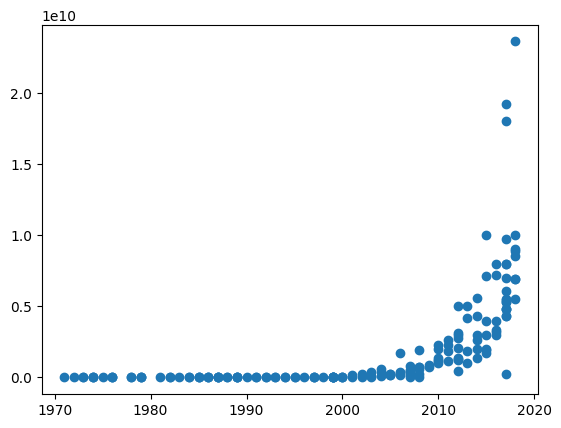

In [26]:
plt.scatter(X,Y)

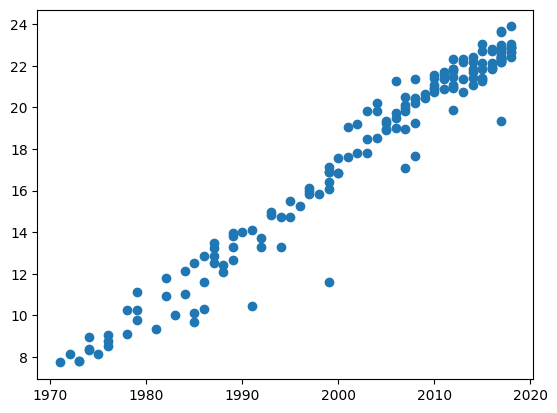

In [27]:
Y=np.log(Y)
plt.scatter(X,Y)

 we can see it's pretty much a straight line which justifies our use of linear regression.

In [28]:
X=X-X.mean()
X

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086],
       [-26.19753086],
       [-24.19753086],
       [-24.19753086],
       [-23.19753086],
       [-23.19753086],
       [-23.19753086],
       [-21.19753086],
       [-20.19753086],
       [-20.19753086],
       [-19.19753086],
       [-18.19753086],
       [-18.19753086],
       [-17.19753086],
       [-17.19753086],
       [-17.19753086],
       [-16.19753086],
       [-16.19753086],
       [-16.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-14.19753086],
       [-14.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-12.19753086],
       [-11.19753086],
       [-11.19753086],
       [-10.19753086],
       [-10.19753086],
       [ -9

these inputs, they start from 1970 and they go up to about 2020.

And so generally speaking, in machine learning, this is not good. This is going to mess up our algorithms.

In [29]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
  loss="mse",
)
#So the first argument is the learning rate, and the second argument is momentum.

because we didn't scale the data, that makes the optimization a bit harder.

And so we need to use these custom optimizers to get the exact values we need.

In [31]:
def schedule(epoch,learning_rate):
  if epoch>=50:
    return 0.0001
  return 0.001
scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)
#So we're going to just say if Epoc is greater than or equal to 50. So if it's past 50 epochs, we're going to return 0.0001.

In [32]:
r=model.fit(X,Y,epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 512.6287 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 363.6562 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 235.2587 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 183.2327 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 173.9942 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 121.2170 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 103.5569 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 64.9437 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 55.9571 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 40.8050 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

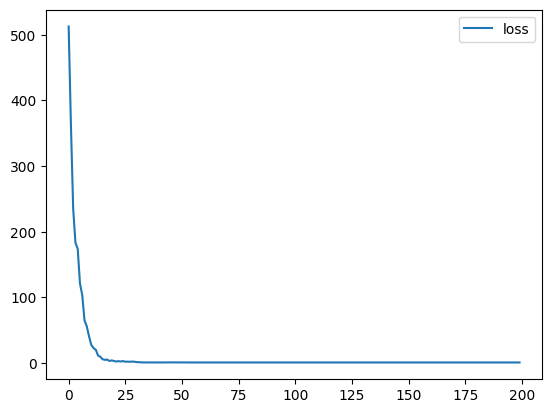

In [33]:
#plot the loss
plt.plot(r.history['loss'],label='loss')
plt.legend();

In [34]:
model.layers

In [35]:
model.layers[0].get_weights()
#But our goal right now is to see if we can interpret this slope because this tells us how fast the transistor count is growing.

[array([[0.33982596]], dtype=float32), array([17.7554], dtype=float32)]

In [36]:
a=model.layers[0].get_weights()[0][0,0]
a

0.33982596

**Part 2: Making Predictions**


6/6 [==============================] - 0s 1ms/step


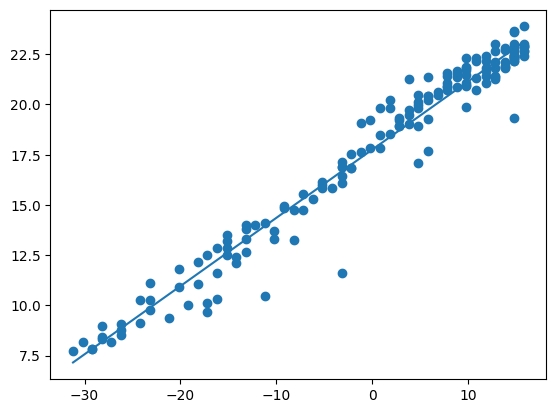

In [37]:
#make sure the line fits our data
Yhat=model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [ ]:
#manual calculation

#get weights
w,b=model.layers[0].get_weights()

#reshape X because we flaten it again earlier
X=X.reshape(-1,1)

#(N*1) *(1*1) +1
Yhat2=(X.dot(w)+b).flatten

#do not use ==for floating points beacuse floating points numbers always are rounded so even they are close if we use == it says they are not equall
np.allclose(Yhat,Yhat2)